<a href="https://colab.research.google.com/github/adityaas26/Deep-Learning/blob/master/CNN_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [21]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.4997 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.3763 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.3390 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.3133 - acc: 0.8850
Epoch 5/5
10000/10000 [==============================] - 1s 148us/sample - loss: 0.3737 - acc: 0.8660


In [25]:
test_loss = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss[0], test_loss[1]*100))

10000/10000 [==============================] - 1s 103us/sample - loss: 0.3737 - acc: 0.8660
Test loss: 0.3737465793132782, Test accuracy: 86.59999966621399


## CNN

In [0]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0

In [30]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total para

In [32]:
test_result = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_result[0], test_result[1]*100))


10000/10000 [==============================] - 2s 198us/sample - loss: 0.2550 - acc: 0.9069
Test loss: 0.2550429364323616, Test accuracy: 90.68999886512756


In [35]:
# visualize the results
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


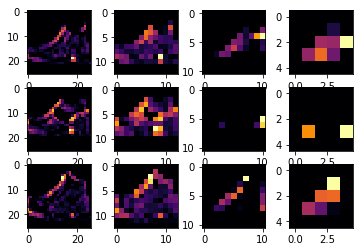

In [36]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)